In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import glob
import numpy as np

import matplotlib as mpl
	
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)


In [3]:
filenames = glob.glob('*csv')


/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_14686/747150966.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdata_RNA = newdata_RNA.append(dataRNA, ignore_index=True)
/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_14686/747150966.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdata_GUV = newdata_GUV.append(dataGUV, ignore_index=True)
/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_14686/747150966.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdata_RNA = newdata_RNA.append(dataRNA, ignore_index=True)
/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_14686/747150966.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas

/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_14686/747150966.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdata_RNA = newdata_RNA.append(dataRNA, ignore_index=True)
/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_14686/747150966.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdata_GUV = newdata_GUV.append(dataGUV, ignore_index=True)
/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_14686/747150966.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdata_RNA = newdata_RNA.append(dataRNA, ignore_index=True)
/var/folders/71/fj0d3hg915n7zlmz97_f8dt40000gq/T/ipykernel_14686/747150966.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas

[0.2944648832572255, 0.8251630398383965, 0.8811222366141556, 0.881793881329731, 0.606212969631399, 0.24889624050519504, 0.6772100413210275, 0.7558477895753037, 0.6563187853507465, 0.4627150241238382, 0.8064728584020193, 0.2439870310285613, 0.8064728584020193, 0.8268009151340826, 0.8033622381931403, 0.8109691433887828, 0.7959846327016343, 0.8213227007846364, 0.6961991189270035, 0.8006564376125028, 0.8384872351717236, 0.7631381849013478, 0.6818906718729668, 0.8568578384669437, 0.6205187433217115, 0.8196014297871754, 0.7138224453013782, 0.8811222366141556, 0.7736925882776297, 0.881793881329731, 0.7725916703357356, 0.2697788314259345, 0.8015605071646383, 0.43380033754715197, 0.6803072974841247, 0.6711703468824394, 0.7300515162712145, 0.7400504129218669, 0.5629050971969388, 0.7888076826905944, 0.7399973942938491, 0.26503142708790794, 0.39349147747743424, 0.6407819217599532, 0.40196661930275907, 0.6711703468824394, 0.6553670806968988, 0.7392020303735177, 0.7918254751893432, 0.817359772346668

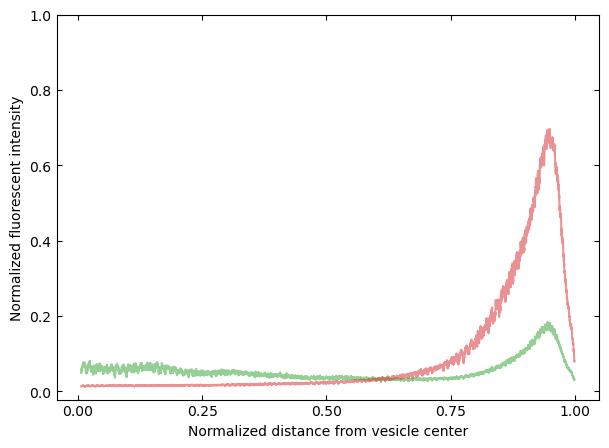

In [7]:
fig, ax = plt.subplots(figsize=(7,5))  
newdata_RNA = pd.DataFrame()
newdata_GUV = pd.DataFrame()
listcom=[]
for i in range(len(filenames)):
    test = 'RNA' in filenames[i]
    if test == True: 
        name= filenames[i]
        newname = name.replace('RNA','GUV')
        #print(newname)
        dataRNA = pd.read_csv(filenames[i], skiprows=1, delimiter=',', dtype='float', names=['x','y'])
        dataGUV = pd.read_csv(newname, skiprows=1, delimiter=',', dtype='float', names=['x','y'])
    
        dataRNA['x']= dataRNA['x'].div(max(dataRNA['x']))
        dataRNA['y']= dataRNA['y'].div(max(dataGUV['y']))
        
        centerofmass=np.sum(dataRNA['x']*dataRNA['y'])/np.sum(dataRNA['y'])
        #print(centerofmass)
        listcom.append(centerofmass)
        
        
        newdata_RNA = newdata_RNA.append(dataRNA, ignore_index=True)
        #print(newdata)
        
        dataGUV['x']= dataGUV['x'].div(max(dataGUV['x']))
        dataGUV['y']= dataGUV['y'].div(max(dataGUV['y']))
        newdata_GUV = newdata_GUV.append(dataGUV, ignore_index=True)
        
        

print(listcom)
newdata_RNA=newdata_RNA.sort_values(by=['x'])
newdata_GUV=newdata_GUV.sort_values(by=['x'])
#print(newdata)
roll_RNA=newdata_RNA.rolling(window=100).mean()
roll_GUV=newdata_GUV.rolling(window=100).mean()
#print(roll)
plt.plot(roll_RNA['x'],roll_RNA['y'], color='C2', alpha=0.5)
plt.plot(roll_GUV['x'],roll_GUV['y'], color='C3', alpha=0.5)


plt.xlabel('Normalized distance from vesicle center')
plt.ylabel('Normalized fluorescent intensity')
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,1,5))

ax.tick_params(axis="y",direction="in", right=True)
ax.tick_params(axis="x",direction="in", top=True)

plt.savefig('plot.png', dpi=1000)

In [12]:
np.savetxt("listcom.csv", listcom, delimiter=",")
print(np.std(listcom))
np.mean(listcom)


0.18448384902268494


0.682612715861522

In [5]:
x=newdata_RNA['x']
y=newdata_RNA['y']

newdata_RNA.loc["Total"] = newdata_RNA.astype(float).sum(axis=0)

sum=newdata_RNA.loc['Total','y']



center = (np.sum(x*y)) / sum
print(center)

0.5492831209713968
